In [21]:
import  numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,10]
import warnings
warnings.filterwarnings('ignore')

In [22]:
pd.set_option('display.max_columns',None)
train=pd.read_csv(r"C:\Users\91882\Downloads\train_F3fUq2S.csv")
test=pd.read_csv(r"C:\Users\91882\Downloads\test_Bk2wfZ3.csv")
print(train.shape)
print(test.shape)

(1888, 22)
(762, 21)


In [23]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


In [24]:
train.info()
# Checking Data types of respecctive predictors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [25]:
# Checking Nul values
train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [26]:
# So most of the data types are shown as integer but it should be object
train.sender.value_counts()
# here sender of email is 0 means this users doesnt receive a 

3     1559
10     181
15      89
6       22
9       13
14       7
11       7
0        3
12       3
7        2
2        1
1        1
Name: sender, dtype: int64

In [27]:
train[train.sender.isin([0])]

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
308,309,0,83,6502,129,3,0,Evening,15,9,3,28,1,0,0,0,0,0,5499,0,15,0.008068
321,322,0,83,6456,125,5,1,Evening,15,9,3,33,1,0,0,0,0,0,0,0,15,0.007479
427,428,0,83,6441,125,4,0,Evening,15,9,3,28,1,0,0,0,0,0,4999,0,15,0.012607


In [28]:
for i in range(1,12):
    print(pd.DataFrame(train.iloc[::,i].value_counts()))

    sender
3     1559
10     181
15      89
6       22
9       13
14       7
11       7
0        3
12       3
7        2
2        1
1        1
     subject_len
77            53
85            42
82            40
80            39
86            39
..           ...
205            1
162            1
225            1
186            1
165            1

[170 rows x 1 columns]
       body_len
19716         7
10473         4
14496         4
9603          4
11378         4
...         ...
11915         1
10210         1
16336         1
11772         1
10250         1

[1568 rows x 1 columns]
     mean_paragraph_len
26                   79
23                   72
22                   67
19                   62
21                   61
..                  ...
4                     1
171                   1
87                    1
107                   1
142                   1

[121 rows x 1 columns]
   day_of_week
3          346
2          333
4          329
1          295
5          237
0         

In [29]:
# checking the value_counts() for different features specially for boolean flag
for i in range(12,21):
    print(pd.DataFrame(train.iloc[::,i].value_counts()))

   is_image
0       716
1       685
2       442
3        39
6         4
4         2
   is_personalised
0             1781
1              107
   is_quote
0       885
1       638
2       227
3        93
4        27
5        12
6         6
   is_timer
0      1888
   is_emoticons
0          1626
1           172
2            54
3            30
4             4
6             2
   is_discount
0         1813
1           75
       is_price
0          1875
5499          5
8000          2
5000          2
4999          1
1399          1
1000          1
14999         1
   is_urgency
0        1676
1         212
    target_audience
12             1169
14              175
10              136
16              132
15               61
7                56
1                50
2                20
5                16
6                14
11               12
4                10
13               10
3                 9
8                 9
9                 6
0                 3


In [30]:
# so in is price predictor it shows bolean value but some of the data point have false value so i drop these rows respective
# to those data points
ntrain=train[train.is_price.isin([0])].reset_index(drop=True)
ntrain

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,1884,3,88,1451,75,2,0,Noon,2,11,0,22,0,0,1,0,0,0,0,0,10,0.350746
1871,1885,3,58,10537,40,2,0,Evening,2,11,5,27,0,0,0,0,0,0,0,0,11,0.004728
1872,1886,3,89,11050,26,1,0,Evening,15,9,4,28,0,0,0,0,0,0,0,0,6,0.008289
1873,1887,3,58,10537,40,1,0,Evening,2,11,5,27,0,0,0,0,0,0,0,0,16,0.012014


In [31]:
ntrain.is_price.value_counts()

0    1875
Name: is_price, dtype: int64

In [32]:
test.is_price.value_counts()

0       758
5000      2
4999      1
999       1
Name: is_price, dtype: int64

In [33]:
test.is_timer.value_counts()

0    762
Name: is_timer, dtype: int64

In [34]:
# Changing the name of weekday
ntrain['day_of_week']=ntrain.day_of_week.replace(0,'Monday')
ntrain['day_of_week']=ntrain.day_of_week.replace(1,'Tuesday')
ntrain['day_of_week']=ntrain.day_of_week.replace(2,'Wednesday')
ntrain['day_of_week']=ntrain.day_of_week.replace(3,'Thursday')
ntrain['day_of_week']=ntrain.day_of_week.replace(4,'Friday')
ntrain['day_of_week']=ntrain.day_of_week.replace(5,'Saturday')
ntrain['day_of_week']=ntrain.day_of_week.replace(6,'Sunday')
ntrain.day_of_week.value_counts()

Thursday     343
Wednesday    330
Friday       325
Tuesday      293
Saturday     237
Monday       207
Sunday       140
Name: day_of_week, dtype: int64

In [35]:
# Changing the name of weekday for test set
test['day_of_week']=test.day_of_week.replace(0,'Monday')
test['day_of_week']=test.day_of_week.replace(1,'Tuesday')
test['day_of_week']=test.day_of_week.replace(2,'Wednesday')
test['day_of_week']=test.day_of_week.replace(3,'Thursday')
test['day_of_week']=test.day_of_week.replace(4,'Friday')
test['day_of_week']=test.day_of_week.replace(5,'Saturday')
test['day_of_week']=test.day_of_week.replace(6,'Sunday')
test.day_of_week.value_counts()

Wednesday    138
Friday       135
Thursday     126
Tuesday      117
Saturday      99
Monday        86
Sunday        61
Name: day_of_week, dtype: int64

In [36]:
ntrain.dtypes

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week            object
is_weekend              int64
times_of_day           object
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
is_image                int64
is_personalised         int64
is_quote                int64
is_timer                int64
is_emoticons            int64
is_discount             int64
is_price                int64
is_urgency              int64
target_audience         int64
click_rate            float64
dtype: object

<AxesSubplot:>

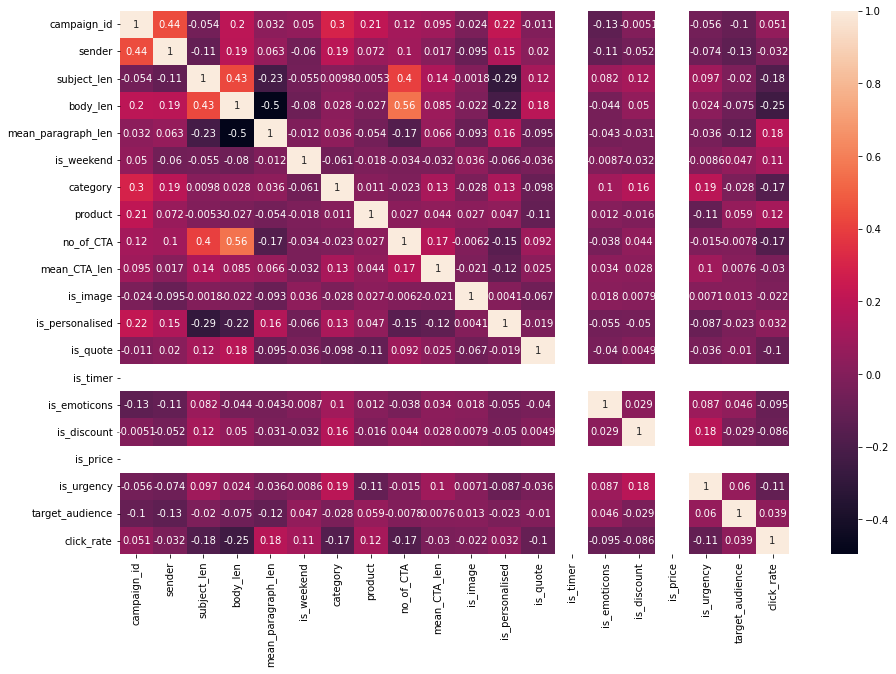

In [37]:
sns.heatmap(ntrain.corr(),annot=True)

In [38]:
# Here i am droping timer & is price features as these feature doesnt caters variability & also droping weekend becuase i 
# replace those values to to their respetive day name
newt=ntrain.drop(['is_timer','is_price','is_weekend','campaign_id'],axis=1)
newt

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,click_rate
0,3,76,10439,39,Saturday,Noon,6,26,3,29,0,0,0,0,0,0,14,0.103079
1,3,54,2570,256,Saturday,Morning,2,11,0,22,0,0,0,0,0,0,10,0.700000
2,3,59,12801,16,Saturday,Noon,2,11,3,23,1,0,1,0,0,0,16,0.002769
3,3,74,11037,30,Friday,Evening,15,9,4,24,0,0,0,0,0,0,10,0.010868
4,3,80,10011,27,Saturday,Noon,6,26,3,31,0,0,1,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,3,88,1451,75,Wednesday,Noon,2,11,0,22,0,0,1,0,0,0,10,0.350746
1871,3,58,10537,40,Wednesday,Evening,2,11,5,27,0,0,0,0,0,0,11,0.004728
1872,3,89,11050,26,Tuesday,Evening,15,9,4,28,0,0,0,0,0,0,6,0.008289
1873,3,58,10537,40,Tuesday,Evening,2,11,5,27,0,0,0,0,0,0,16,0.012014


In [39]:
newtest=test.drop(['is_timer','is_price','is_weekend','campaign_id'],axis=1)
newtest

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience
0,3,61,12871,11,Sunday,Noon,6,26,3,37,1,0,0,1,0,0,14
1,3,54,2569,256,Saturday,Morning,2,11,0,22,0,0,0,0,0,0,10
2,3,88,1473,78,Friday,Evening,2,11,0,22,1,0,1,0,0,0,10
3,3,88,1473,78,Thursday,Evening,2,11,0,22,1,0,1,0,0,0,10
4,3,78,9020,29,Thursday,Noon,6,26,2,40,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,3,72,9081,46,Monday,Evening,15,9,4,28,0,0,0,0,0,0,7
758,3,58,10537,40,Thursday,Evening,2,11,5,27,0,0,0,0,0,0,16
759,3,100,9132,19,Wednesday,Evening,15,9,2,23,0,0,0,0,0,0,15
760,3,88,1451,75,Tuesday,Noon,2,11,0,22,0,0,1,0,0,0,10


In [40]:
newtest.isnull().sum()

sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_emoticons          0
is_discount           0
is_urgency            0
target_audience       0
dtype: int64

<AxesSubplot:>

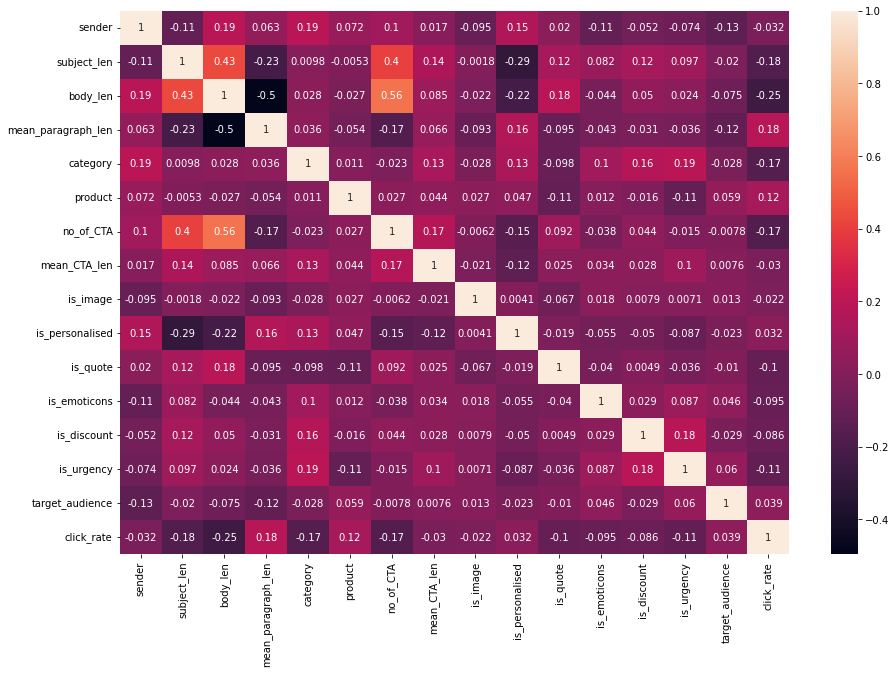

In [41]:
# correlation matrix for thetraining set as we can see that none of them have high correlation with respect to taret variable
sns.heatmap(newt.corr(),annot=True)

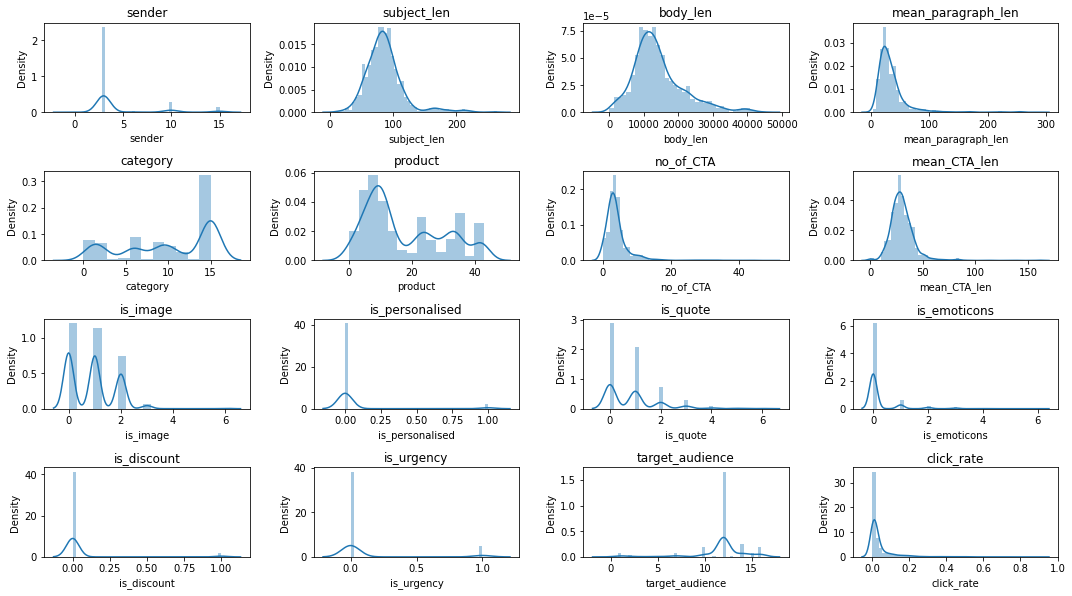

In [42]:
# Checking the distribution of the train data
a=5
b=4
c=1
for i in newt.select_dtypes(np.number).columns:
    plt.subplot(a,b,c)
    sns.distplot(newt.loc[::,i])
    c=c+1
    plt.title(i)

plt.tight_layout()
plt.show()

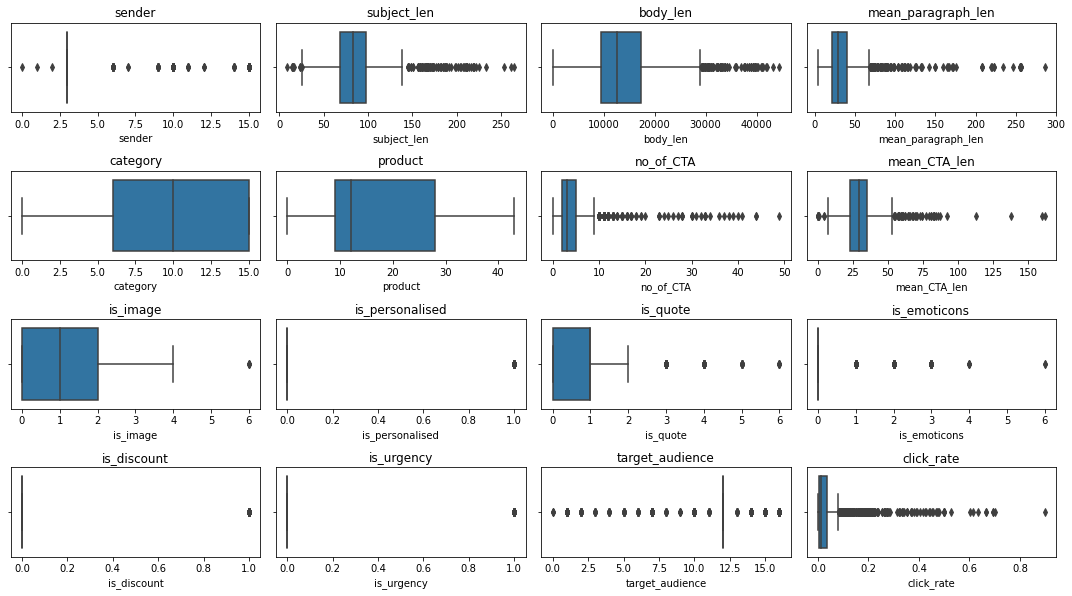

In [43]:
a=5
b=4
c=1
for i in newt.select_dtypes(np.number).columns:
    plt.subplot(a,b,c)
    sns.boxplot(newt.loc[::,i])
    c=c+1
    plt.title(i)
plt.tight_layout()
plt.show()

In [44]:
q1=newt.quantile(0.25)
q3=newt.quantile(0.75)
iqr=q3-q1
uper=q3+1.5*iqr
lower=q1-1.5*iqr
newt[~((newt>uper)|(newt<lower)).any(axis=1)]
# as we can see that after removing ouliers their is huge data loss so data should be intact we will deal with oulliersS

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,click_rate
18,3,71,11334,36,Monday,Evening,15,9,4,31,1,0,1,0,0,0,12,0.005418
37,3,77,12527,37,Tuesday,Evening,15,9,4,33,1,0,0,0,0,0,12,0.005829
110,3,75,11938,30,Sunday,Evening,15,12,3,26,0,0,1,0,0,0,12,0.002358
129,3,79,10474,26,Tuesday,Noon,10,42,4,39,0,0,2,0,0,0,12,0.078912
134,3,53,9526,21,Saturday,Evening,1,5,4,21,0,0,1,0,0,0,12,0.067227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,3,84,20470,24,Thursday,Noon,9,34,7,26,2,0,0,0,0,0,12,0.002522
1827,3,95,15459,26,Saturday,Morning,11,29,8,32,0,0,1,0,0,0,12,0.024876
1830,3,77,13780,28,Saturday,Evening,11,29,8,23,0,0,0,0,0,0,12,0.035891
1844,3,103,14863,8,Sunday,Morning,6,23,7,28,0,0,2,0,0,0,12,0.036184


<AxesSubplot:xlabel='day_of_week', ylabel='click_rate'>

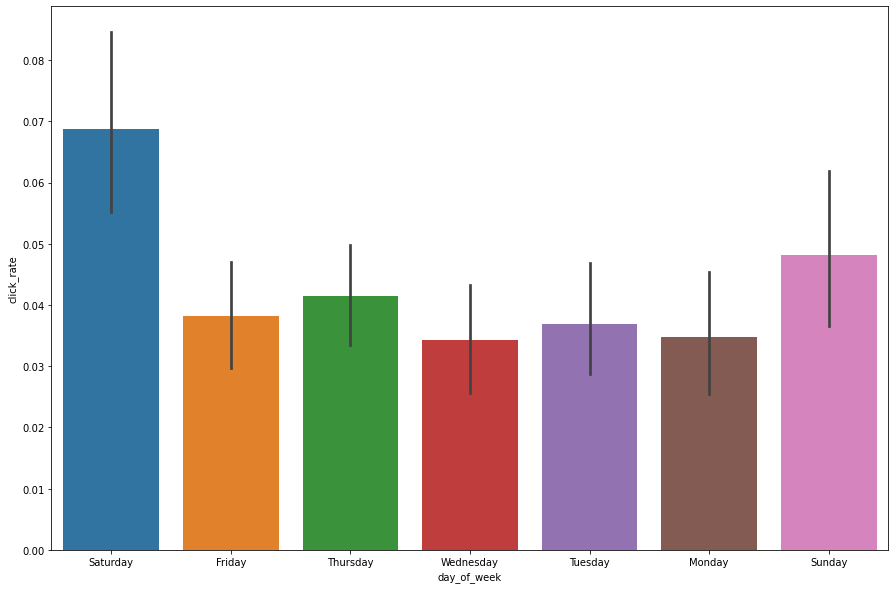

In [45]:
# on which day most of the click rates found?
sns.barplot(newt.day_of_week,newt.click_rate)
# so most of click rates are from weekends 

<AxesSubplot:xlabel='day_of_week', ylabel='click_rate'>

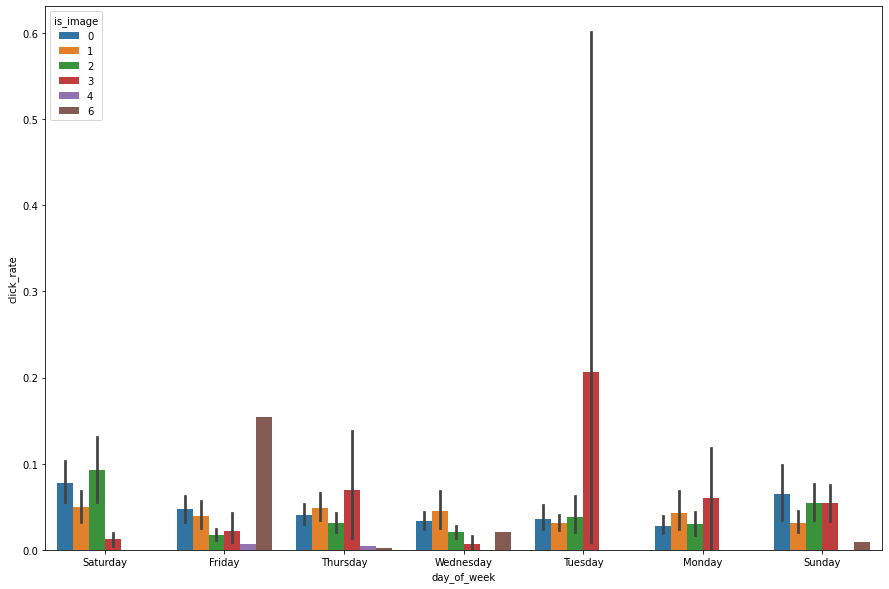

In [46]:
sns.barplot(newt.day_of_week,newt.click_rate,hue=newt.is_image)
# on the basis of image those email have 3 email have high click rates on tuesday & on friday those email have 6 images


<AxesSubplot:xlabel='day_of_week', ylabel='click_rate'>

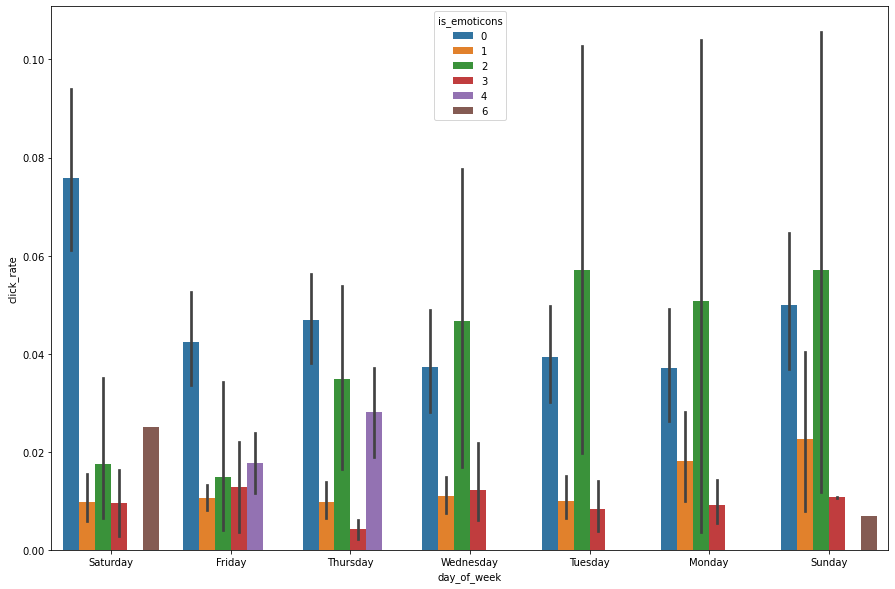

In [47]:
sns.barplot(newt.day_of_week,newt.click_rate,hue=newt.is_emoticons)


<AxesSubplot:xlabel='day_of_week', ylabel='click_rate'>

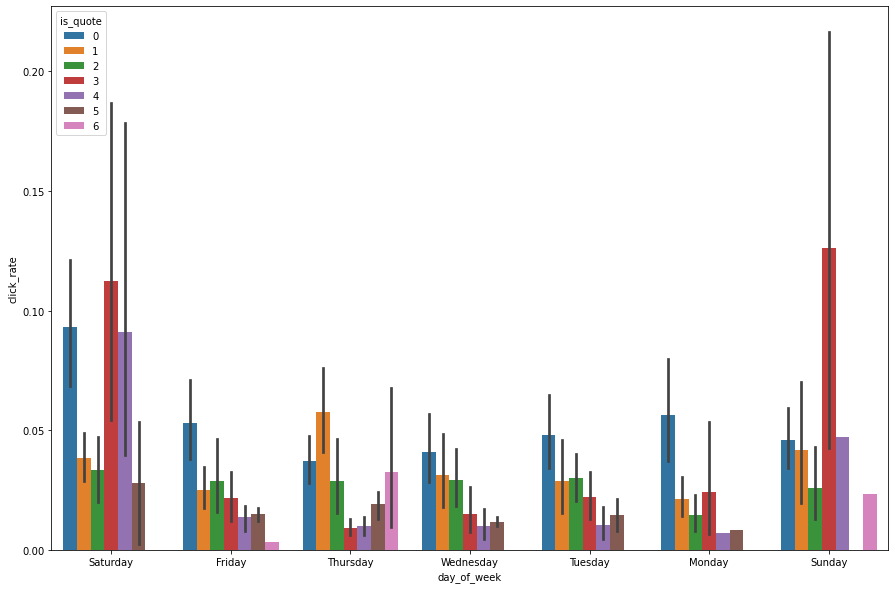

In [48]:
sns.barplot(newt.day_of_week,newt.click_rate,hue=newt.is_quote)


<AxesSubplot:xlabel='day_of_week', ylabel='click_rate'>

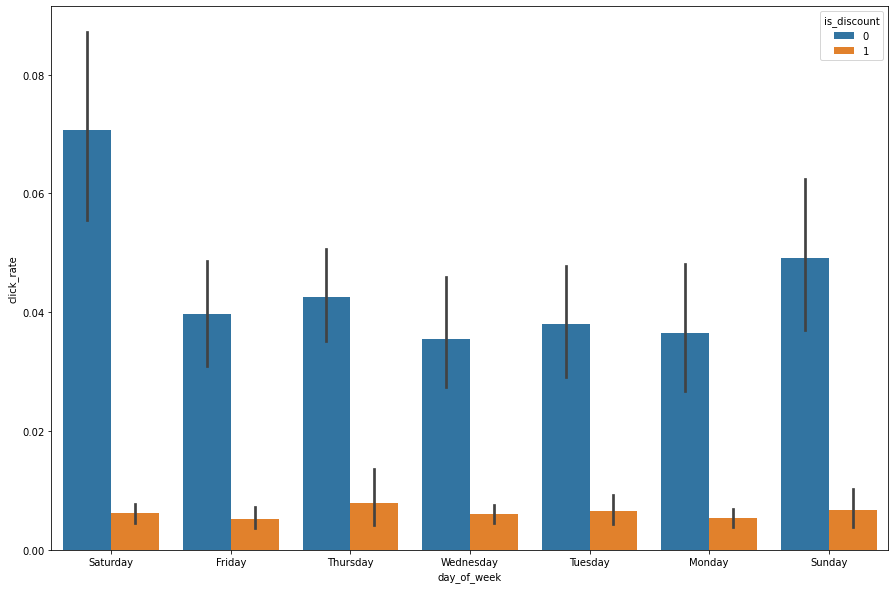

In [49]:
sns.barplot(newt.day_of_week,newt.click_rate,hue=newt.is_discount)


<AxesSubplot:xlabel='times_of_day', ylabel='click_rate'>

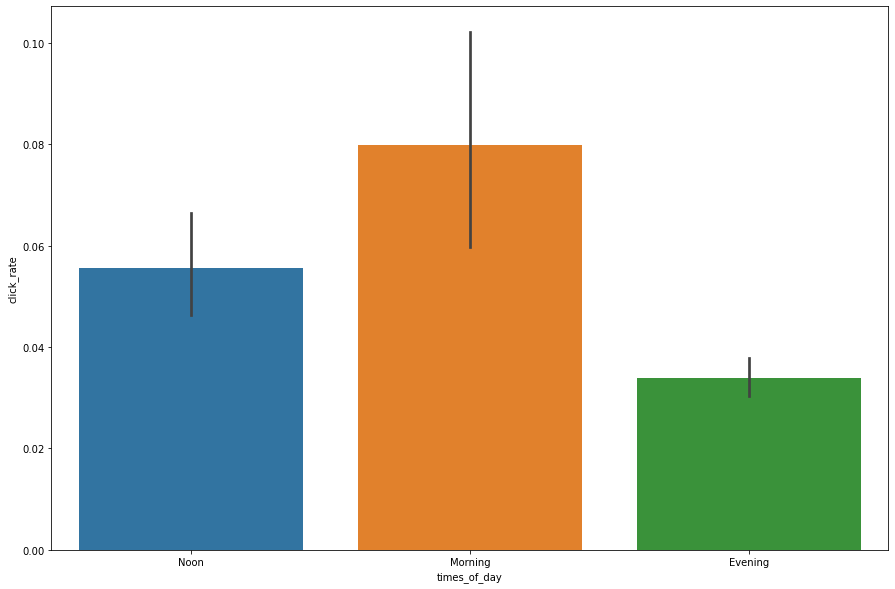

In [50]:
sns.barplot(newt.times_of_day,newt.click_rate)
# here most of the click rates are happened during morning & evening so there might be chances of that people who travel to office
# in morning in the meantime they respond to mail 

<AxesSubplot:xlabel='times_of_day', ylabel='click_rate'>

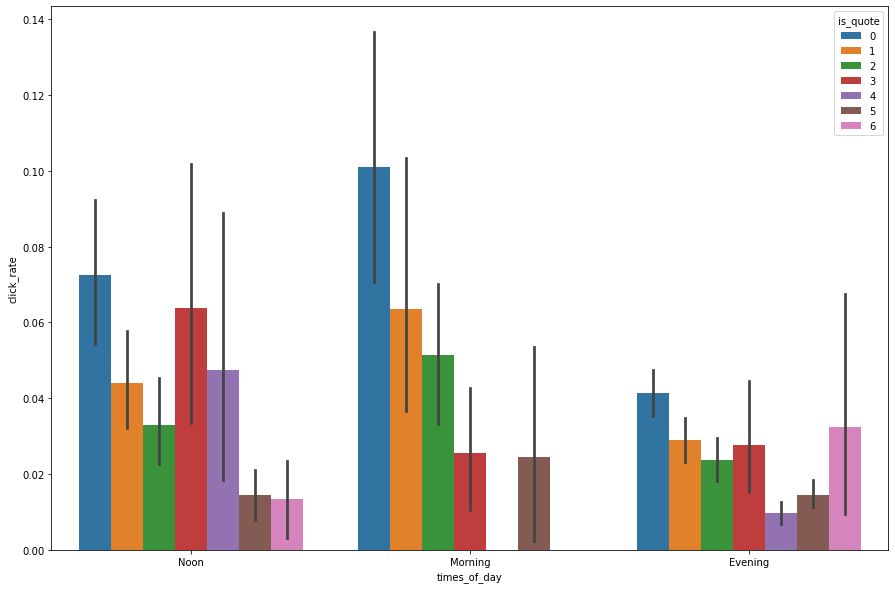

In [51]:
sns.barplot(newt.times_of_day,newt.click_rate,hue=newt.is_quote)


<AxesSubplot:xlabel='times_of_day', ylabel='click_rate'>

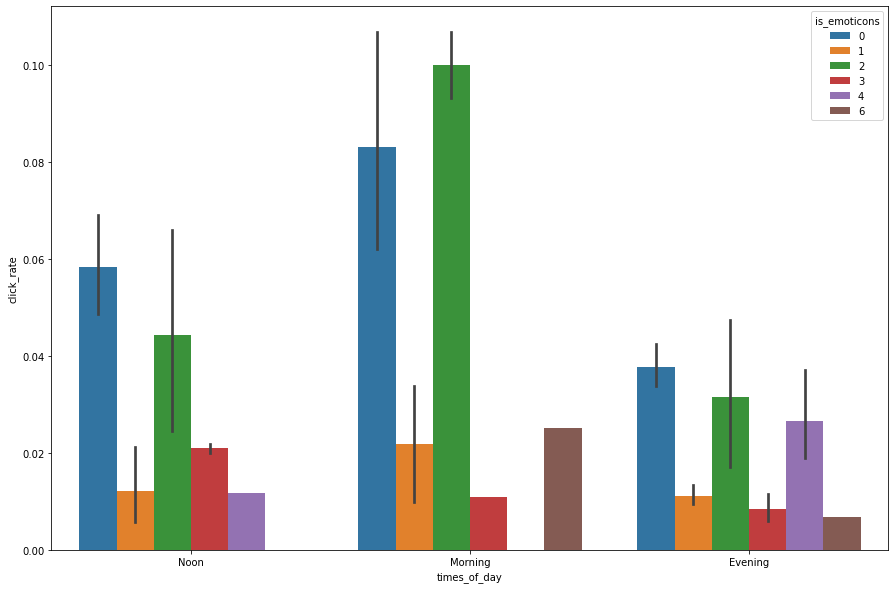

In [52]:
sns.barplot(newt.times_of_day,newt.click_rate,hue=newt.is_emoticons)
# from here we can see that most of the people like 2 emoticons or no emoticons

<AxesSubplot:xlabel='category', ylabel='click_rate'>

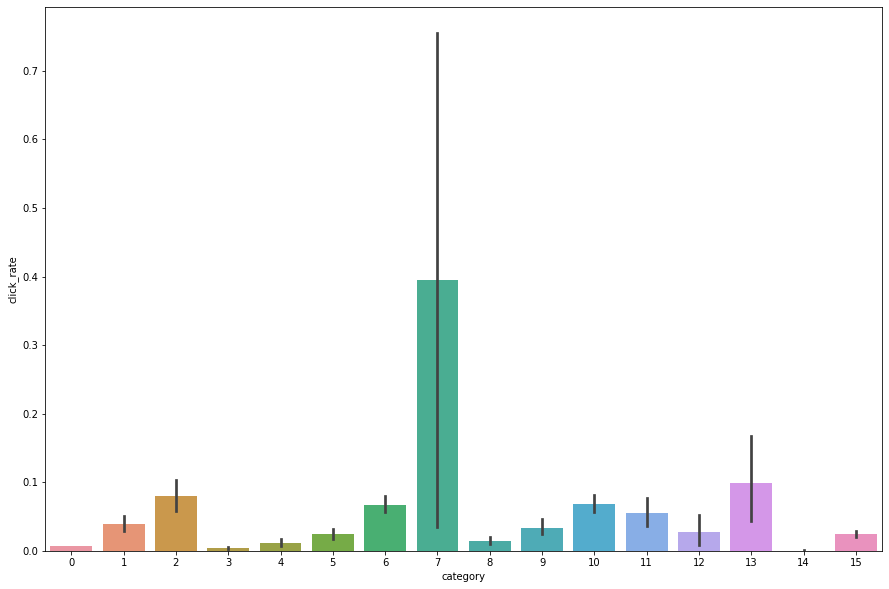

In [53]:
# product base click rates
sns.barplot(newt.category,newt.click_rate)
# mail related to category 7 have heihest click rate means people prefer this category of product

In [54]:
newt

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,click_rate
0,3,76,10439,39,Saturday,Noon,6,26,3,29,0,0,0,0,0,0,14,0.103079
1,3,54,2570,256,Saturday,Morning,2,11,0,22,0,0,0,0,0,0,10,0.700000
2,3,59,12801,16,Saturday,Noon,2,11,3,23,1,0,1,0,0,0,16,0.002769
3,3,74,11037,30,Friday,Evening,15,9,4,24,0,0,0,0,0,0,10,0.010868
4,3,80,10011,27,Saturday,Noon,6,26,3,31,0,0,1,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,3,88,1451,75,Wednesday,Noon,2,11,0,22,0,0,1,0,0,0,10,0.350746
1871,3,58,10537,40,Wednesday,Evening,2,11,5,27,0,0,0,0,0,0,11,0.004728
1872,3,89,11050,26,Tuesday,Evening,15,9,4,28,0,0,0,0,0,0,6,0.008289
1873,3,58,10537,40,Tuesday,Evening,2,11,5,27,0,0,0,0,0,0,16,0.012014


<AxesSubplot:xlabel='subject_len', ylabel='click_rate'>

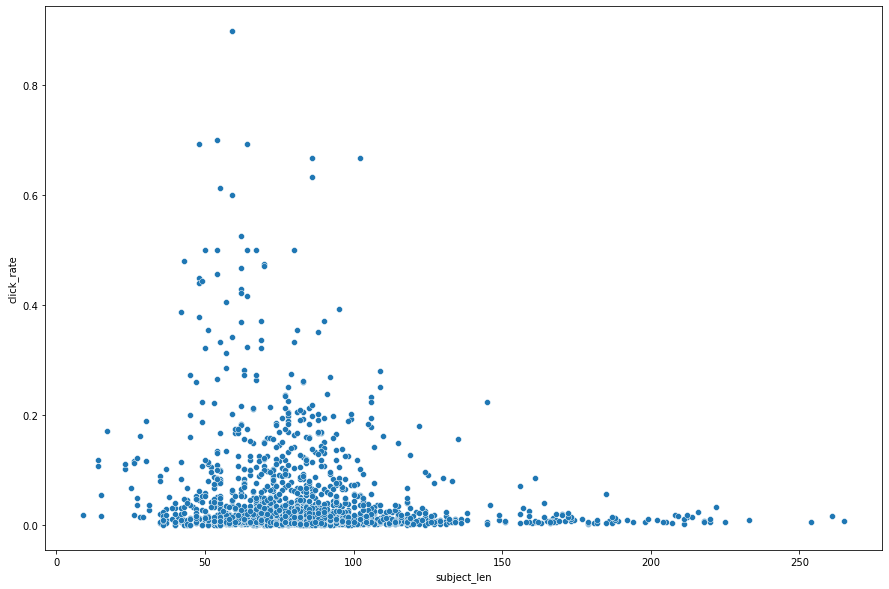

In [55]:
# to check the relation b/w subjct lenth & click rate
sns.scatterplot(newt.subject_len,newt.click_rate)

<AxesSubplot:xlabel='body_len', ylabel='click_rate'>

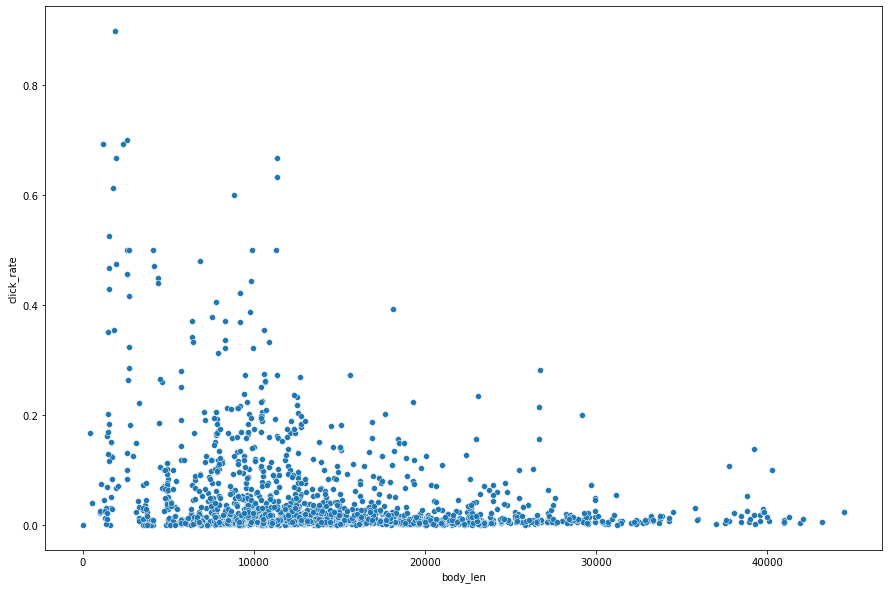

In [56]:
sns.scatterplot(newt.body_len,newt.click_rate)
# as the body lenth increases click rates tends to decrease

<AxesSubplot:xlabel='mean_paragraph_len', ylabel='click_rate'>

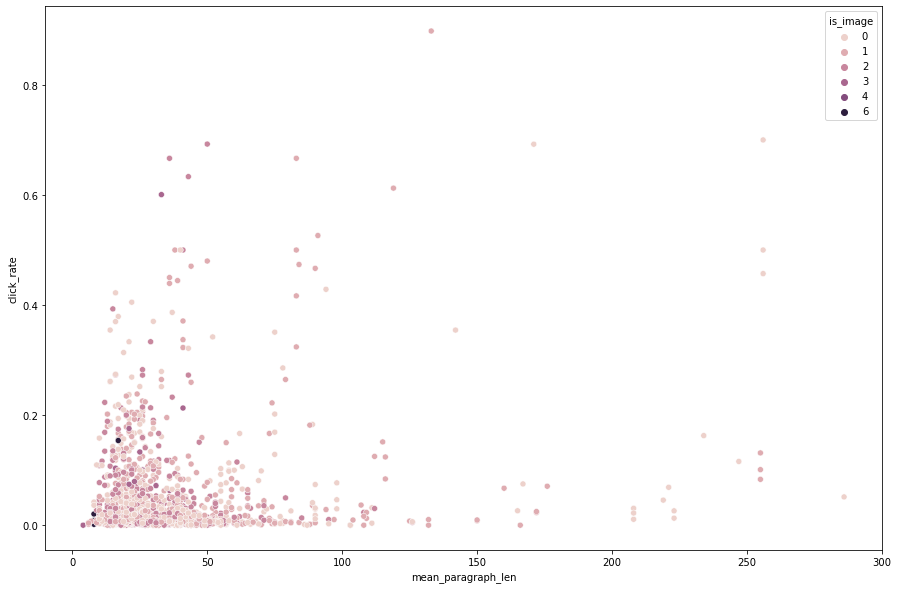

In [57]:
sns.scatterplot(newt.mean_paragraph_len,newt.click_rate,hue=newt.is_image)

In [58]:
# Building a model without transforamtion 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ob=pd.get_dummies(newt.select_dtypes('object'))
num=newt.select_dtypes(np.number).drop('click_rate',axis=1)
numwot=pd.DataFrame(sc.fit_transform(num),columns=num.columns)
x=pd.concat([ob,numwot],axis=1)
y=newt.click_rate

In [59]:
x

,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,times_of_day_Evening,times_of_day_Morning,times_of_day_Noon,sender,subject_len,body_len,mean_paragraph_len,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience
0,0,0,1,0,0,0,0,0,0,1,-0.427333,-0.337170,-0.512152,0.135697,-0.738722,0.680109,-0.264840,-0.101963,-1.048922,-0.246009,-0.809097,-0.345065,-0.201272,-0.354189,0.801691
1,0,0,1,0,0,0,0,0,1,0,-0.427333,-1.067951,-1.586658,7.870583,-1.493137,-0.531295,-0.911140,-0.691509,-1.048922,-0.246009,-0.809097,-0.345065,-0.201272,-0.354189,-0.551603
2,0,0,1,0,0,0,0,0,0,1,-0.427333,-0.901865,-0.189623,-0.684130,-1.493137,-0.531295,-0.264840,-0.607288,0.102559,-0.246009,0.156566,-0.345065,-0.201272,-0.354189,1.478338
3,1,0,0,0,0,0,0,1,0,0,-0.427333,-0.403604,-0.430496,-0.185105,0.958710,-0.692815,-0.049406,-0.523067,-1.048922,-0.246009,-0.809097,-0.345065,-0.201272,-0.354189,-0.551603
4,0,0,1,0,0,0,0,0,0,1,-0.427333,-0.204300,-0.570595,-0.292039,-0.738722,0.680109,-0.264840,0.066478,-1.048922,-0.246009,0.156566,-0.345065,-0.201272,-0.354189,0.801691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,0,0,0,0,0,0,1,0,0,1,-0.427333,0.061439,-1.739457,1.418904,-1.493137,-0.531295,-0.911140,-0.691509,-1.048922,-0.246009,0.156566,-0.345065,-0.201272,-0.354189,-0.551603
1871,0,0,0,0,0,0,1,1,0,0,-0.427333,-0.935082,-0.498770,0.171341,-1.493137,-0.531295,0.166027,-0.270405,-1.048922,-0.246009,-0.809097,-0.345065,-0.201272,-0.354189,-0.213279
1872,0,0,0,0,0,1,0,1,0,0,-0.427333,0.094656,-0.428721,-0.327684,0.958710,-0.692815,-0.049406,-0.186184,-1.048922,-0.246009,-0.809097,-0.345065,-0.201272,-0.354189,-1.904897
1873,0,0,0,0,0,1,0,1,0,0,-0.427333,-0.935082,-0.498770,0.171341,-1.493137,-0.531295,0.166027,-0.270405,-1.048922,-0.246009,-0.809097,-0.345065,-0.201272,-0.354189,1.478338


In [60]:
newtest.shape

(762, 17)

In [61]:
obt=pd.get_dummies(newtest.select_dtypes('object'))
numts=newtest.select_dtypes(np.number)
numwts=pd.DataFrame(sc.fit_transform(numts),columns=numts.columns)
xtest=pd.concat([obt,numwts],axis=1)
xtest.shape

(762, 25)

In [62]:
x.shape

(1875, 25)

In [63]:
numwts.isnull().sum()

sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_emoticons          0
is_discount           0
is_urgency            0
target_audience       0
dtype: int64

In [66]:
import lightgbm as lgb
lgbm=lgb.LGBMRegressor(random_state=10)
lgbpred = lgbm.fit(x,y).predict(xtest)
sol=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':lgbpred})
sol.to_csv('jobathonlgbmhypermodel.csv',index=False)


In [48]:
# Hyper parameters for random forest
from sklearn.model_selection import GridSearchCV
params={'num_leaves':[40,50,60,70],
        'max_depth':[3,5,7,8,9],
        'n_estimators':[50,100,150,200],
        'learning_rate':[0.01,0.03,0.05,0.1,0.15]}

from sklearn.model_selection import GridSearchCV,KFold
kv=KFold(n_splits=5,shuffle=True,random_state=10)
gsv=GridSearchCV(lgbm,param_grid=params,cv=kv)
gsvmodel=gsv.fit(x,y)
print('best parameter;',gsvmodel.best_params_)

best parameter; {'learning_rate': 0.15, 'max_depth': 9, 'n_estimators': 200, 'num_leaves': 40}


In [50]:
lgbm=lgb.LGBMRegressor(learning_rate= 0.15, max_depth= 9, n_estimators= 200, num_leaves= 40)
lgbpred = lgbm.fit(x,y).predict(xtest)
sol=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':lgbpred})
sol.to_csv('jobathonlgbmhypermodel.csv',index=False)

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
params={'min_samples_split':[2,5,8,10,12],
        'max_leaf_nodes':[2,5,8,10,12],
        'max_depth':[5,10,15,20],
        'n_estimators':[10,20,30,40,50,60],}

from sklearn.model_selection import GridSearchCV,KFold
kv=KFold(n_splits=5,shuffle=True,random_state=10)
gsv=GridSearchCV(rf,param_grid=params,cv=kv)
gsvmodel=gsv.fit(x,y)
print('best parameter;',gsvmodel.best_params_)


best parameter; {'max_depth': 20, 'max_leaf_nodes': 12, 'min_samples_split': 2, 'n_estimators': 60}


In [59]:
rf=RandomForestRegressor(max_depth= 20, max_leaf_nodes= 12, min_samples_split= 2, n_estimators= 60)
model=rf.fit(x,y)
hpprd=model.predict(xtest)
sol=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':hpprd})
sol.to_csv('jobrfmodel.csv',index=False)

In [231]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()
gbmpred=gbm.fit(x,y).predict(xtest)
sol=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':gbmpred})
sol.to_csv('jobgbmmodel.csv',index=False)

In [240]:
import xgboost as xgb
xg=xgb.XGBRegressor()
xgpred=xg.fit(x,y).predict(xtest)
sol=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':gbmpred})
sol.to_csv('jobxgbmodel.csv',index=False)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model=rf.fit(x,y)
prd=model.predict(xtest)
imp_feature=pd.DataFrame({'Feature':x.columns,'Importance':model.feature_importances_})
newimp=imp_feature.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(25,30))
sns.barplot(y='Feature',x='Importance',data=newimp)

NameError: name 'x' is not defined

In [303]:
import copy
transformt=copy.deepcopy(newt)
transformt

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,click_rate
0,3,76,10439,39,Saturday,Noon,6,26,3,29,0,0,0,0,0,0,14,0.103079
1,3,54,2570,256,Saturday,Morning,2,11,0,22,0,0,0,0,0,0,10,0.700000
2,3,59,12801,16,Saturday,Noon,2,11,3,23,1,0,1,0,0,0,16,0.002769
3,3,74,11037,30,Friday,Evening,15,9,4,24,0,0,0,0,0,0,10,0.010868
4,3,80,10011,27,Saturday,Noon,6,26,3,31,0,0,1,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,3,88,1451,75,Wednesday,Noon,2,11,0,22,0,0,1,0,0,0,10,0.350746
1871,3,58,10537,40,Wednesday,Evening,2,11,5,27,0,0,0,0,0,0,11,0.004728
1872,3,89,11050,26,Tuesday,Evening,15,9,4,28,0,0,0,0,0,0,6,0.008289
1873,3,58,10537,40,Tuesday,Evening,2,11,5,27,0,0,0,0,0,0,16,0.012014


In [301]:
# To check the skewness of the data points
for i in  newt.select_dtypes(np.number).columns:
    print(newt[i].skew(),i)

2.1800085493527064 sender
1.6422078463909842 subject_len
1.1335057225756493 body_len
4.338597354582699 mean_paragraph_len
-0.4854034696482952 category
0.600702623380988 product
4.4653999846209045 no_of_CTA
2.8899459844952933 mean_CTA_len
0.7938803463309864 is_image
3.8219435231926835 is_personalised
1.5995843728465062 is_quote
3.74273408036996 is_emoticons
4.770938538696083 is_discount
2.471135513356441 is_urgency
-1.8815848698876314 target_audience
4.303037818079412 click_rate


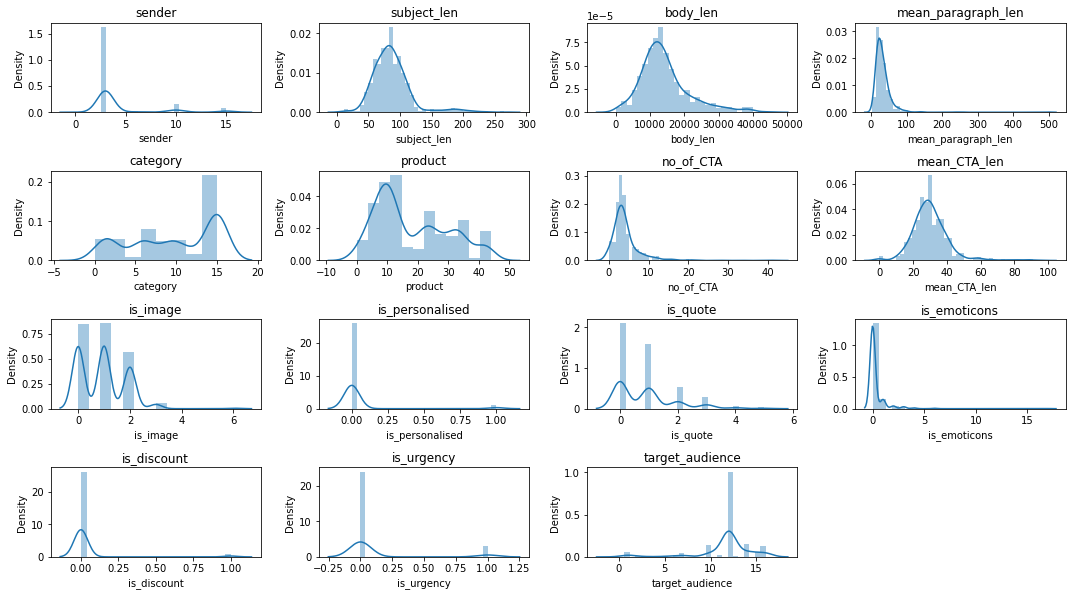

In [262]:
a=5
b=4
c=1
for i in newtest.select_dtypes(np.number).columns:
    plt.subplot(a,b,c)
    sns.distplot(newtest.loc[::,i])
    c=c+1
    plt.title(i)

plt.tight_layout()
plt.show()


In [304]:
# Building a model with squareroot transforamtion
for i in transformt.select_dtypes(np.number).columns[0:15]:
    transformt[i]=np.sqrt(transformt[i])

In [306]:
transtest=copy.deepcopy(newtest)
transtest

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience
0,3,61,12871,11,Sunday,Noon,6,26,3,37,1,0,0,1,0,0,14
1,3,54,2569,256,Saturday,Morning,2,11,0,22,0,0,0,0,0,0,10
2,3,88,1473,78,Friday,Evening,2,11,0,22,1,0,1,0,0,0,10
3,3,88,1473,78,Thursday,Evening,2,11,0,22,1,0,1,0,0,0,10
4,3,78,9020,29,Thursday,Noon,6,26,2,40,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,3,72,9081,46,Monday,Evening,15,9,4,28,0,0,0,0,0,0,7
758,3,58,10537,40,Thursday,Evening,2,11,5,27,0,0,0,0,0,0,16
759,3,100,9132,19,Wednesday,Evening,15,9,2,23,0,0,0,0,0,0,15
760,3,88,1451,75,Tuesday,Noon,2,11,0,22,0,0,1,0,0,0,10


In [307]:
for i in transtest.select_dtypes(np.number).columns[0:15]:
    transtest[i]=np.sqrt(transtest[i])

In [308]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ob=pd.get_dummies(transformt.select_dtypes('object'))
num=transformt.select_dtypes(np.number).drop('click_rate',axis=1)
numwot=pd.DataFrame(sc.fit_transform(num),columns=num.columns)
xt=pd.concat([ob,numwot],axis=1)
yt=transformt.click_rate

In [311]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ob=pd.get_dummies(transtest.select_dtypes('object'))
num=transtest.select_dtypes(np.number)
numt=pd.DataFrame(sc.fit_transform(num),columns=num.columns)
numtranstest=pd.concat([ob,numt],axis=1)
numtranstest

,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,times_of_day_Evening,times_of_day_Morning,times_of_day_Noon,sender,subject_len,body_len,mean_paragraph_len,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience
0,0,0,0,1,0,0,0,0,0,1,-0.408278,-0.878848,-0.064358,-1.359414,-0.457614,0.778554,-0.180491,0.665318,0.398179,-0.212762,-1.023719,1.613828,-0.180334,-0.359011,0.643832
1,0,0,1,0,0,0,0,0,1,0,-0.408278,-1.177045,-2.183614,6.442758,-1.463069,-0.452849,-2.286554,-0.676563,-1.254730,-0.212762,-1.023719,-0.399332,-0.180334,-0.359011,-0.337385
2,1,0,0,0,0,0,0,1,0,0,-0.408278,0.135364,-2.599112,2.033219,-1.463069,-0.452849,-2.286554,-0.676563,0.398179,-0.212762,0.515144,-0.399332,-0.180334,-0.359011,-0.337385
3,0,0,0,0,1,0,0,1,0,0,-0.408278,0.135364,-2.599112,2.033219,-1.463069,-0.452849,-2.286554,-0.676563,0.398179,-0.212762,0.515144,-0.399332,-0.180334,-0.359011,-0.337385
4,0,0,0,0,1,0,0,0,0,1,-0.408278,-0.219201,-0.688223,-0.086953,-0.457614,0.778554,-0.566961,0.898347,-1.254730,-0.212762,-1.023719,-0.399332,-0.180334,-0.359011,0.643832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0,1,0,0,0,0,0,1,0,0,-0.408278,-0.442942,-0.677398,0.772512,0.924875,-0.671595,0.145318,-0.097262,-1.254730,-0.212762,-1.023719,-0.399332,-0.180334,-0.359011,-1.212156
758,0,0,0,0,1,0,0,1,0,0,-0.408278,-1.004432,-0.429037,0.490913,-1.463069,-0.452849,0.432362,-0.189157,-1.254730,-0.212762,-1.023719,-0.399332,-0.180334,-0.359011,1.081352
759,0,0,0,0,0,0,1,1,0,0,-0.408278,0.535195,-0.668376,-0.718260,0.924875,-0.671595,-0.566961,-0.574968,-1.254730,-0.212762,-1.023719,-0.399332,-0.180334,-0.359011,0.866241
760,0,0,0,0,0,1,0,0,0,1,-0.408278,0.135364,-2.608826,1.927717,-1.463069,-0.452849,-2.286554,-0.676563,-1.254730,-0.212762,0.515144,-0.399332,-0.180334,-0.359011,-0.337385


In [312]:
xt

,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,times_of_day_Evening,times_of_day_Morning,times_of_day_Noon,sender,subject_len,body_len,mean_paragraph_len,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience
0,0,0,1,0,0,0,0,0,0,1,-0.434801,-0.282680,-0.429030,0.329256,-0.515013,0.781347,-0.137358,-0.011980,-1.214330,-0.246009,-0.996781,-0.389069,-0.201272,-0.354189,0.666084
1,0,0,1,0,0,0,0,0,1,0,-0.434801,-1.171919,-2.125383,5.832162,-1.524771,-0.383617,-2.084623,-0.681548,-1.214330,-0.246009,-0.996781,-0.389069,-0.201272,-0.354189,-0.351723
2,0,0,1,0,0,0,0,0,0,1,-0.434801,-0.955879,-0.067521,-0.937172,-1.524771,-0.383617,-0.137358,-0.579953,0.433866,-0.246009,0.545731,-0.389069,-0.201272,-0.354189,1.119919
3,1,0,0,0,0,0,0,1,0,0,-0.434801,-0.357668,-0.333935,-0.103853,0.873392,-0.590561,0.163885,-0.480544,-1.214330,-0.246009,-0.996781,-0.389069,-0.201272,-0.354189,-0.351723
4,0,0,1,0,0,0,0,0,0,1,-0.434801,-0.135609,-0.498776,-0.262409,-0.515013,0.781347,-0.137358,0.164001,-1.214330,-0.246009,0.545731,-0.389069,-0.201272,-0.354189,0.666084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,0,0,0,0,0,0,1,0,0,1,-0.434801,0.147892,-2.540708,1.691729,-1.524771,-0.383617,-2.084623,-0.681548,-1.214330,-0.246009,0.545731,-0.389069,-0.201272,-0.354189,-0.351723
1871,0,0,0,0,0,0,1,1,0,0,-0.434801,-0.998332,-0.413263,0.374136,-1.524771,-0.383617,0.429285,-0.194142,-1.214330,-0.246009,-0.996781,-0.389069,-0.201272,-0.354189,-0.080578
1872,0,0,0,0,0,1,0,1,0,0,-0.434801,0.182407,-0.331896,-0.317203,0.873392,-0.590561,0.163885,-0.102248,-1.214330,-0.246009,-0.996781,-0.389069,-0.201272,-0.354189,-1.603890
1873,0,0,0,0,0,1,0,1,0,0,-0.434801,-0.998332,-0.413263,0.374136,-1.524771,-0.383617,0.429285,-0.194142,-1.214330,-0.246009,-0.996781,-0.389069,-0.201272,-0.354189,1.119919


In [313]:
rf=RandomForestRegressor()
mode=rf.fit(xt,yt)
rfprd=model.predict(numtranstest)
solt=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':rfprd})
solt.to_csv('rftransjob.csv',index=False)